In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization, MaxPooling2D, Conv2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [10]:
df = pd.read_csv("content/ecg_autoencoder_dataset.csv", header = None)
df

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0.608558,-0.335651,-0.990948,-1.784153,-2.626145,-2.957065,-2.931897,-2.664816,-2.090137,-1.461841,...,1.757705,2.291923,2.704595,2.451519,2.017396,1.704358,1.688542,1.629593,1.342651,0
4994,-2.060402,-2.860116,-3.405074,-3.748719,-3.513561,-3.006545,-2.234850,-1.593270,-1.075279,-0.976047,...,1.388947,2.079675,2.433375,2.159484,1.819747,1.534767,1.696818,1.483832,1.047612,0
4995,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,-0.645363,...,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334,0
4996,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,-1.374321,...,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932,0


In [11]:
X = df.drop([140], axis = 1)
y = df[140]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
scaler = StandardScaler()
X_train =  scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
encoder = Sequential([Dense(64, activation = 'relu', input_shape = (X_train.shape[1],))])
decoder = Sequential([Dense(X_train.shape[1], activation = 'sigmoid')])

In [15]:
autoencoder = Sequential([encoder, decoder])

In [16]:
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [17]:
r = autoencoder.fit(X_train, X_train, epochs = 100, batch_size = 64, validation_data= (X_test, X_test))

Epoch 1/100


55/55 [==============================] - 1s 4ms/step - loss: 0.9736 - accuracy: 0.0252 - val_loss: 0.7720 - val_accuracy: 0.0260
Epoch 2/100
55/55 [==============================] - 0s 1ms/step - loss: 0.7313 - accuracy: 0.0477 - val_loss: 0.7096 - val_accuracy: 0.0687
Epoch 3/100
55/55 [==============================] - 0s 1ms/step - loss: 0.6951 - accuracy: 0.0780 - val_loss: 0.6893 - val_accuracy: 0.0887
Epoch 4/100
55/55 [==============================] - 0s 2ms/step - loss: 0.6787 - accuracy: 0.0915 - val_loss: 0.6769 - val_accuracy: 0.1100
Epoch 5/100
55/55 [==============================] - 0s 1ms/step - loss: 0.6679 - accuracy: 0.0992 - val_loss: 0.6688 - val_accuracy: 0.1200
Epoch 6/100
55/55 [==============================] - 0s 1ms/step - loss: 0.6608 - accuracy: 0.1078 - val_loss: 0.6630 - val_accuracy: 0.1247
Epoch 7/100
55/55 [==============================] - 0s 1ms/step - loss: 0.6555 - accuracy: 0.1235 - val_loss: 0.6586 - val_accuracy: 0.1387
Epoch 8/100

55/55 [==============================] - 0s 1ms/step - loss: 0.6275 - accuracy: 0.2367 - val_loss: 0.6353 - val_accuracy: 0.2460
Epoch 56/100
55/55 [==============================] - 0s 1ms/step - loss: 0.6274 - accuracy: 0.2396 - val_loss: 0.6352 - val_accuracy: 0.2473
Epoch 57/100
55/55 [==============================] - 0s 2ms/step - loss: 0.6273 - accuracy: 0.2399 - val_loss: 0.6351 - val_accuracy: 0.2467
Epoch 58/100
55/55 [==============================] - 0s 1ms/step - loss: 0.6271 - accuracy: 0.2419 - val_loss: 0.6350 - val_accuracy: 0.2493
Epoch 59/100
55/55 [==============================] - 0s 1ms/step - loss: 0.6270 - accuracy: 0.2441 - val_loss: 0.6349 - val_accuracy: 0.2447
Epoch 60/100
55/55 [==============================] - 0s 1ms/step - loss: 0.6269 - accuracy: 0.2441 - val_loss: 0.6348 - val_accuracy: 0.2500
Epoch 61/100
55/55 [==============================] - 0s 1ms/step - loss: 0.6268 - accuracy: 0.2424 - val_loss: 0.6346 - val_accuracy: 0.2513
Epoch 62/100
55/55 

In [18]:
r.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0, 0.5, 'loss')

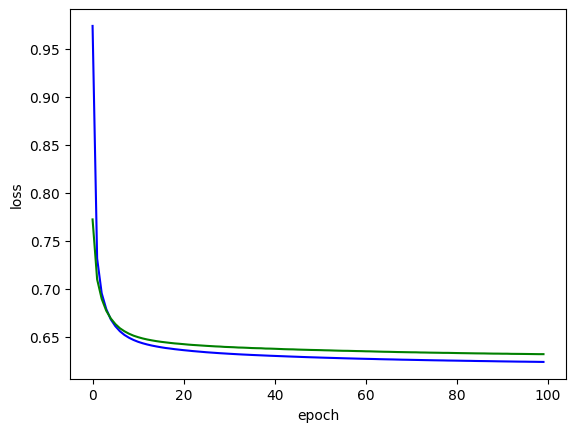

In [19]:
plt.plot(r.history['loss'], label = 'loss', color = 'blue')
plt.plot(r.history['val_loss'], label = 'val_loss', color = 'green')
plt.legend
plt.xlabel('epoch')
plt.ylabel('loss')

<function matplotlib.pyplot.legend(*args, **kwargs)>

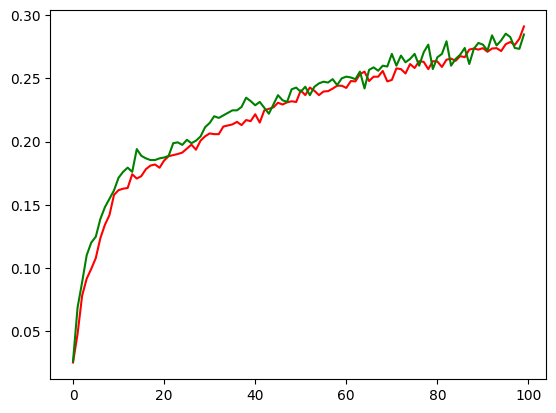

In [20]:
plt.plot(r.history['accuracy'], label = 'acc', color = 'red')
plt.plot(r.history['val_accuracy'], label = 'val_acc', color = 'green')
plt.legend

In [21]:
loss = autoencoder.evaluate(X_test, X_test)
print(f'Test Loss: {loss}')

47/47 [==============================] - 0s 761us/step - loss: 0.6317 - accuracy: 0.2847
Test Loss: [0.6316700577735901, 0.28466665744781494]


In [22]:
decoded_data = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - decoded_data, 2), axis = 1)
threshold = np.percentile(mse, 95)

outliers = mse> threshold
print("Confusion Matrix:\n", confusion_matrix(y_test, outliers))
print("Classification report:\n", classification_report(y_test, outliers))

47/47 [==============================] - 0s 1ms/step
Confusion Matrix:
 [[575  47]
 [850  28]]
Classification report:
               precision    recall  f1-score   support

           0       0.40      0.92      0.56       622
           1       0.37      0.03      0.06       878

    accuracy                           0.40      1500
   macro avg       0.39      0.48      0.31      1500
weighted avg       0.39      0.40      0.27      1500



In [23]:
num_outliers = np.sum(outliers)
num_anomalies = np.sum(y_test[outliers] == 1)

In [24]:
print(f'Number of outliers: {num_outliers}')
print(f'Number of anomalies: {num_anomalies}')

Number of outliers: 75
Number of anomalies: 28
